In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from  sklearn.preprocessing import StandardScaler

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SsJzr5Enkqv497DZUGkW6p_ithvDctubFHmfJUuxbTSY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'salaryprediction-donotdelete-pr-8mntrf2qibamdx'
object_key = 'All tiers data (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,s_id,name,profile_link,tier,gender,branch,cgpa,inter_gpa,ssc_gpa,internships,...,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,other_skills,is_placed,salary_as_fresher
0,1,NaN,https://www.linkedin.com/in/shubham-yadav-b862...,1,M,CSE,NaN,NaN,10.0,2,...,1,4,1,0,1,1,0,NaN,1,30.0
1,2,NaN,https://www.linkedin.com/in/pranav-patel-97780...,1,M,CSE,NaN,NaN,10.0,1,...,1,4,1,0,1,1,0,NaN,1,15.0
2,3,NaN,https://www.linkedin.com/in/kshitij-garg/,1,M,CSE,NaN,NaN,NaN,1,...,1,5,1,0,1,1,0,NaN,1,22.0
3,4,NaN,https://www.linkedin.com/in/akash-garg-5757a290/,1,M,CSE,9.59,NaN,10.0,3,...,1,5,1,0,1,1,0,NaN,1,14.0
4,5,NaN,https://www.linkedin.com/in/shubham-jadhav-493...,1,M,CSE,NaN,NaN,9.8,3,...,1,3,1,0,1,1,0,NaN,1,11.0


In [3]:
df.columns

Index(['s_id', 'name', 'profile_link', 'tier', 'gender', 'branch', 'cgpa',
       'inter_gpa', 'ssc_gpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'other_skills', 'is_placed',
       'salary_as_fresher'],
      dtype='object')

In [4]:
df.drop(columns=['s_id','name','profile_link','gender'],inplace=True)

In [5]:
df

,tier,branch,cgpa,inter_gpa,ssc_gpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,other_skills,is_placed,salary_as_fresher
0,1,CSE,NaN,NaN,10.0,2,5,1,1,4,1,0,1,1,0,NaN,1,30.0
1,1,CSE,NaN,NaN,10.0,1,4,1,1,4,1,0,1,1,0,NaN,1,15.0
2,1,CSE,NaN,NaN,NaN,1,5,1,1,5,1,0,1,1,0,NaN,1,22.0
3,1,CSE,9.59,NaN,10.0,3,8,1,1,5,1,0,1,1,0,NaN,1,14.0
4,1,CSE,NaN,NaN,9.8,3,4,1,1,3,1,0,1,1,0,NaN,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2,MECH,5.40,8.4,9.8,0,0,0,0,0,0,0,0,0,0,NaN,0,0.0
131,2,ECE,7.30,8.4,9.4,0,1,1,1,1,0,0,0,0,0,NaN,0,0.0
132,2,ECE,6.70,8.3,9.7,0,0,0,0,1,1,0,0,0,0,NaN,0,0.0
133,2,CSE,7.50,9.0,10.0,1,2,1,1,1,1,0,1,0,0,NaN,0,0.0


In [6]:
df.isnull().sum()

tier                                 0
branch                               0
cgpa                                 9
inter_gpa                           56
ssc_gpa                             55
internships                          0
no_of_projects                       0
is_participate_hackathon             0
is_participated_extracurricular      0
no_of_programming_languages          0
dsa                                  0
mobile_dev                           0
web_dev                              0
Machine Learning                     0
cloud                                0
other_skills                       114
is_placed                            0
salary_as_fresher                    0
dtype: int64

In [7]:
df['inter_gpa']=df['inter_gpa'].mean()
df['ssc_gpa']=df['ssc_gpa'].mean()
df['cgpa']=df['cgpa'].mean()

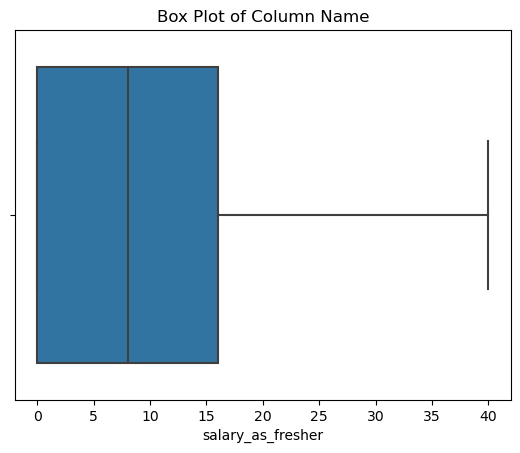

In [8]:
sea.boxplot(x=df['salary_as_fresher'], data=df)
plt.title('Box Plot of Column Name')
plt.show()


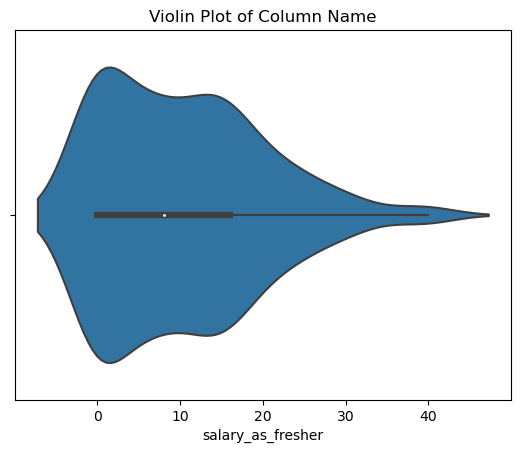

In [9]:

# Create a violin plot to visualize outliers
sea.violinplot(x=df['salary_as_fresher'], data=df)
plt.title('Violin Plot of Column Name')
plt.show()


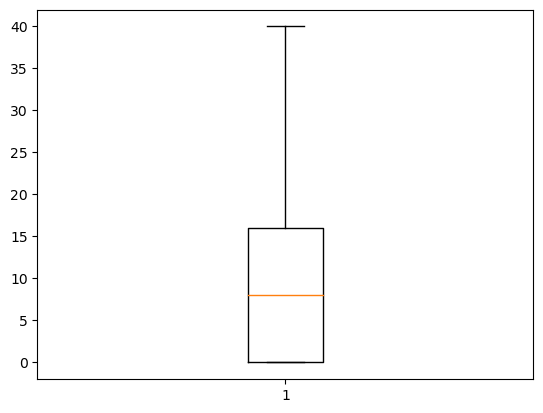

<Figure size 1000x700 with 0 Axes>

In [10]:
plt.boxplot(df['salary_as_fresher'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [14]:
df.columns

Index(['tier', 'branch', 'cgpa', 'inter_gpa', 'ssc_gpa', 'internships',
       'no_of_projects', 'is_participate_hackathon',
       'is_participated_extracurricular', 'no_of_programming_languages', 'dsa',
       'mobile_dev', 'web_dev', 'Machine Learning', 'cloud', 'other_skills',
       'is_placed', 'salary_as_fresher'],
      dtype='object')

<AxesSubplot:>

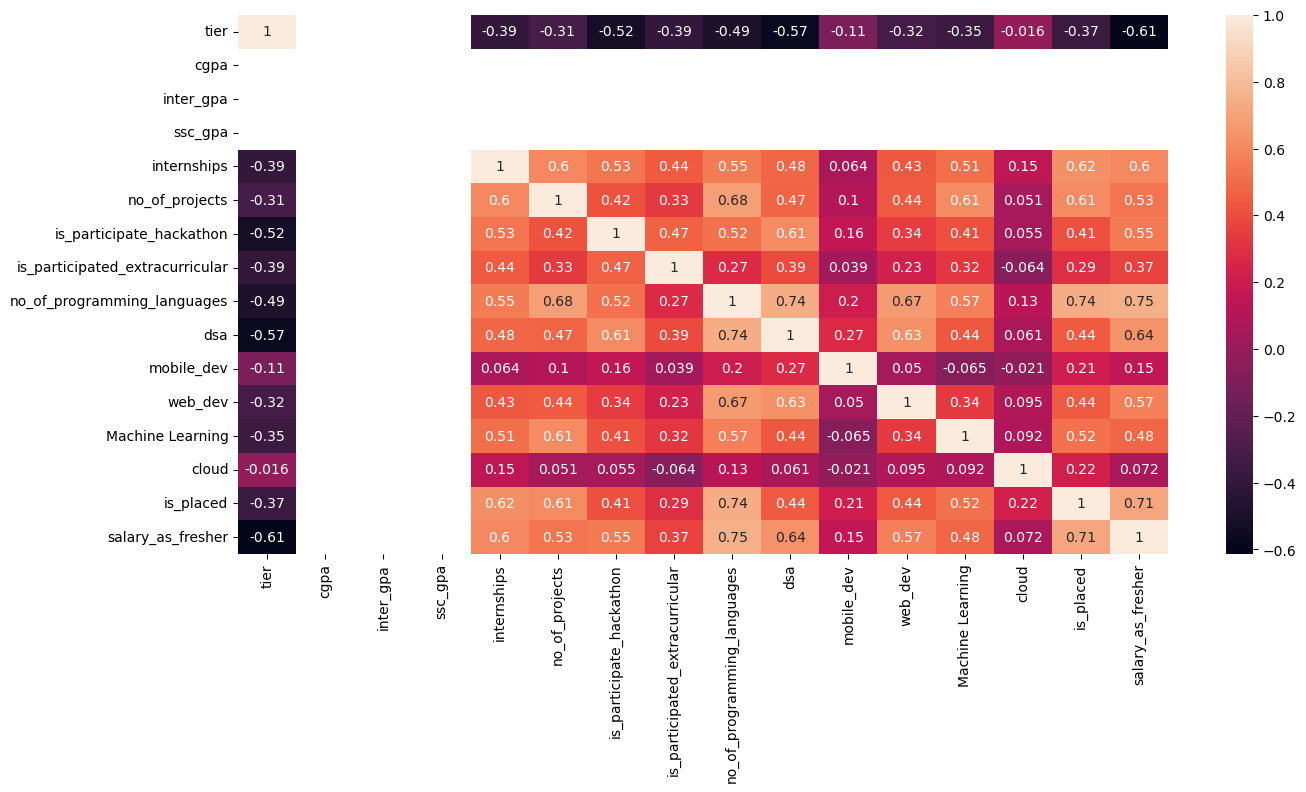

In [16]:
fig = plt.figure(figsize =(15, 7))
sea.heatmap(df.corr(),annot=True)

In [17]:
df.branch.unique()

array(['CSE', 'ECE', 'MECH', 'EEE', 'IT'], dtype=object)

In [18]:
dummy = pd.get_dummies(df.branch)

In [19]:
df=pd.concat([df,dummy],axis=1)

In [20]:
df.shape

(135, 23)

In [21]:
# most frequent values filling here
#df['other_skills'].fillna(df['other_skills'].mode()[0], inplace=True)


In [22]:
df.other_skills.isnull().sum()

114

In [23]:
df.drop(columns=['EEE','branch','other_skills','ssc_gpa','inter_gpa'],inplace=True)


In [24]:
df.isnull().sum()

tier                               0
cgpa                               0
internships                        0
no_of_projects                     0
is_participate_hackathon           0
is_participated_extracurricular    0
no_of_programming_languages        0
dsa                                0
mobile_dev                         0
web_dev                            0
Machine Learning                   0
cloud                              0
is_placed                          0
salary_as_fresher                  0
CSE                                0
ECE                                0
IT                                 0
MECH                               0
dtype: int64

In [25]:
#dummy2=pd.get_dummies(df['other_skills'])

In [26]:
#df['other_skills'].value_counts()
#df.other_skills.unique()

In [27]:
#df=pd.concat([df,dummy2],axis=1)
#df.drop(columns=['other_skills','verilog,vlsi cad,matlab'
#],inplace=True)

In [28]:
X = df.drop(columns=['salary_as_fresher'],axis=1)
y=df['salary_as_fresher']

In [29]:
X

,tier,cgpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,is_placed,CSE,ECE,IT,MECH
0,1,8.135556,2,5,1,1,4,1,0,1,1,0,1,1,0,0,0
1,1,8.135556,1,4,1,1,4,1,0,1,1,0,1,1,0,0,0
2,1,8.135556,1,5,1,1,5,1,0,1,1,0,1,1,0,0,0
3,1,8.135556,3,8,1,1,5,1,0,1,1,0,1,1,0,0,0
4,1,8.135556,3,4,1,1,3,1,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2,8.135556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
131,2,8.135556,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0
132,2,8.135556,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
133,2,8.135556,1,2,1,1,1,1,0,1,0,0,0,1,0,0,0


In [30]:
y.shape

(135,)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=3)

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.score(X_train,y_train)

0.7575365468992417

In [35]:
pre_salary=model.predict(X_test)

In [36]:
pre_salary

array([11.95681872, 13.58124345, 11.0436426 , 21.10220634, 18.35493814,
       11.49971047, 15.97824957, 17.99225459, 20.23227491, 20.46680976,
       19.8330225 , 18.94022087,  3.75735197,  9.78704496])

In [37]:
X_test

,tier,cgpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,is_placed,CSE,ECE,IT,MECH
15,2,8.135556,3,4,1,1,2,0,0,0,0,0,1,0,1,0,0
73,3,8.135556,0,3,0,0,4,0,0,1,0,0,1,1,0,0,0
57,1,8.135556,1,4,0,1,1,0,0,0,0,0,1,0,0,0,1
86,1,8.135556,2,4,1,1,4,1,0,1,1,0,1,1,0,0,0
6,1,8.135556,0,6,0,1,4,1,0,1,1,0,1,1,0,0,0
41,2,8.135556,3,4,1,1,2,1,0,0,0,0,1,0,1,0,0
25,2,8.135556,4,2,0,1,3,1,0,1,1,0,1,1,0,0,0
47,2,8.135556,2,3,1,1,4,1,0,1,1,0,1,1,0,0,0
5,1,8.135556,1,6,0,1,5,1,0,1,1,0,1,1,0,0,0
85,1,8.135556,1,5,1,1,4,1,0,1,1,0,1,1,0,0,0


In [38]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [39]:
mean_absolute_error(y_test,pre_salary)

6.131583575917057

In [40]:
mean_absolute_percentage_error(y_test,pre_salary)

1208686351580209.5

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
RR_M=RandomForestRegressor()
RR_M.fit(X_train,y_train)
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
RR_M.score(X_train,y_train)

0.9516843986595219

In [43]:
Out1=RR_M.predict(X_test)
mean_absolute_error(Out1,y_test)

6.826484693877549

In [44]:
DT.score(X_train,y_train)

0.9967994260824342

In [45]:
out=DT.predict(X_test)
out

array([17.,  8., 15., 20., 30., 17., 25., 23., 26., 30., 40., 15.,  0.,
        7.])

In [46]:
mean_absolute_error(out,y_test)

7.0

In [66]:
X_test.columns

Index(['tier', 'cgpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'is_placed', 'CSE', 'ECE', 'IT', 'MECH'],
      dtype='object')

In [67]:
import pickle

pickle.dump(DT,open('salary_model.pkl', 'wb'))



In [68]:
!pip install -U ibm-watson-machine-learning

In [69]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [70]:
wml_credentials={
    "apikey":"24eP7Cq3X4-ER33spQD970Wvc7AUD2hcvnW1-UzIhtmM",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [71]:
wml_client=APIClient(wml_credentials)

In [72]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
98d205c3-7f14-4b96-9c8d-56d5b49fc57a  Salary_prediction     2023-08-26T14:01:31.184Z
533b833a-a4c6-4d55-921c-b42603766374  Placement_prediction  2023-08-24T16:33:22.454Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,98d205c3-7f14-4b96-9c8d-56d5b49fc57a,Salary_prediction,2023-08-26T14:01:31.184Z
1,533b833a-a4c6-4d55-921c-b42603766374,Placement_prediction,2023-08-24T16:33:22.454Z


In [83]:
SPACE_ID="98d205c3-7f14-4b96-9c8d-56d5b49fc57a"

In [84]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [85]:
MODEL_NAME='Salary'
DEPLOYMENT_NAME='deploy2'
BEST_MODEL=DT

In [86]:
software_spec_uid= wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [87]:
model_pros={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [88]:
model_details = wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_pros,
    training_data=X_train,
    training_target=y_train
)

In [89]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'salary_as_fresher',
  'schemas': {'input': [{'fields': [{'name': 'tier', 'type': 'int64'},
      {'name': 'cgpa', 'type': 'float64'},
      {'name': 'internships', 'type': 'int64'},
      {'name': 'no_of_projects', 'type': 'int64'},
      {'name': 'is_participate_hackathon', 'type': 'int64'},
      {'name': 'is_participated_extracurricular', 'type': 'int64'},
      {'name': 'no_of_programming_languages', 'type': 'int64'},
      {'name': 'dsa', 'type': 'int64'},
      {'name': 'mobile_dev', 'type': 'int64'},
      {'name': 'web_dev', 'type': 'int64'},
      {'name': 'Machine Learning', 'type': 'int64'},
      {'name': 'cloud', 'type': 'int64'},
      {'name': 'is_placed', 'type': 'int64'},
      {'name': 'CSE', 'type': 'uint8'},
      {'name': 'ECE', 'type': 'uint8'},
      {'name': 'IT', 'type': 'uint8'},
      {'name': 'MECH', 'type': 'uint8'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_s

In [90]:
model_uid = wml_client.repository.get_model_id(model_details)
model_uid

'cddb1f70-b372-4382-a2ba-f2d76040303e'

In [91]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [92]:
placement_deploy = wml_client.deployments.create(
     artifact_uid = model_uid,
     meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'cddb1f70-b372-4382-a2ba-f2d76040303e' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dc10c86f-9380-4eba-b2c9-9b7c06d03e2a'
------------------------------------------------------------------------------------------------




In [93]:
import sklearn

In [94]:
sklearn.__version__

'1.1.1'